In [66]:
##The data below has been imported from the COVID 19 India patient database from the following sources:
#1.https://github.com/dishamakhija/covid19-india/blob/master/data/time_series_covid19_confirmed_India_20200410.csv
#2.https://docs.google.com/spreadsheets/d/e/2PACX-1vSz8Qs1gE_IYpzlkFkCXGcL_BqR8hZieWVi-rphN1gfrO3H4lDtVZs4kd0C3P8Y9lhsT1rhoB-Q_cP4/pubhtml
#Both data sources have a live count of the number of confirmed,deceased and recovered cases in India
#The code takes these numbers and plots graphs for the same.
#The graphs from this code is put up on my website @ https://sites.google.com/site/sohamdasgupta04
import matplotlib
import lmfit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lmfit.models import LorentzianModel, ExponentialModel, PowerLawModel
from numpy import linspace
plt.close('all')
from pprint import pprint
from datetime import timedelta, date

In [67]:
last_k = 1
df_us = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")
df_india = pd.read_csv("data/daily_data_updated.csv")
state = 'MH'

In [68]:
df_india

,date,status,Country,Total,AN,AP,AR,AS,BR,CH,...,PY,PB,RJ,SK,TN,TG,TR,UP,UT,WB
0,14-Mar-20,Confirmed,India,81,0,1,0,0,0,0,...,0,1,3,0,1,1,0,12,0,0.0
1,14-Mar-20,Recovered,India,9,0,0,0,0,0,0,...,0,0,1,0,0,0,0,4,0,0.0
2,14-Mar-20,Deceased,India,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,15-Mar-20,Confirmed,India,27,0,0,0,0,0,0,...,0,0,1,0,0,2,0,1,0,0.0
4,15-Mar-20,Recovered,India,4,0,0,0,0,0,0,...,0,0,2,0,0,1,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,18-Apr-20,Recovered,India,426,0,7,0,3,5,0,...,3,1,17,0,82,0,0,26,0,4.0
107,18-Apr-20,Deceased,India,35,0,2,0,0,1,0,...,0,2,4,0,0,0,0,0,0,2.0
108,19-Apr-20,Confirmed,India,1580,1,44,0,0,10,3,...,0,10,127,0,105,49,0,125,2,23.0
109,19-Apr-20,Recovered,India,388,0,23,0,5,0,4,...,0,6,5,0,46,0,0,19,2,7.0


In [69]:
def daterange(date1, date2):
    for n in range(int ((date2 - date1).days)+1):
        yield date1 + timedelta(n)

start_dt = date(2020, 3, 10)
end_dt = date(2020, 4, 11)
analysis_dates = []
for dt in daterange(start_dt, end_dt):
    analysis_dates.append(dt.strftime("%Y-%m-%d"))

In [70]:
df_india

,date,status,Country,Total,AN,AP,AR,AS,BR,CH,...,PY,PB,RJ,SK,TN,TG,TR,UP,UT,WB
0,14-Mar-20,Confirmed,India,81,0,1,0,0,0,0,...,0,1,3,0,1,1,0,12,0,0.0
1,14-Mar-20,Recovered,India,9,0,0,0,0,0,0,...,0,0,1,0,0,0,0,4,0,0.0
2,14-Mar-20,Deceased,India,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,15-Mar-20,Confirmed,India,27,0,0,0,0,0,0,...,0,0,1,0,0,2,0,1,0,0.0
4,15-Mar-20,Recovered,India,4,0,0,0,0,0,0,...,0,0,2,0,0,1,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,18-Apr-20,Recovered,India,426,0,7,0,3,5,0,...,3,1,17,0,82,0,0,26,0,4.0
107,18-Apr-20,Deceased,India,35,0,2,0,0,1,0,...,0,2,4,0,0,0,0,0,0,2.0
108,19-Apr-20,Confirmed,India,1580,1,44,0,0,10,3,...,0,10,127,0,105,49,0,125,2,23.0
109,19-Apr-20,Recovered,India,388,0,23,0,5,0,4,...,0,6,5,0,46,0,0,19,2,7.0


In [71]:
df_india_e = df_india[df_india.status == "Confirmed"]
ind_confirmed = df_india_e.reset_index()
ind_confirmed

,index,date,status,Country,Total,AN,AP,AR,AS,BR,...,PY,PB,RJ,SK,TN,TG,TR,UP,UT,WB
0,0,14-Mar-20,Confirmed,India,81,0,1,0,0,0,...,0,1,3,0,1,1,0,12,0,0.0
1,3,15-Mar-20,Confirmed,India,27,0,0,0,0,0,...,0,0,1,0,0,2,0,1,0,0.0
2,6,16-Mar-20,Confirmed,India,15,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0.0
3,9,17-Mar-20,Confirmed,India,11,0,0,0,0,0,...,0,0,0,0,0,1,0,2,0,1.0
4,12,18-Mar-20,Confirmed,India,37,0,0,0,0,0,...,0,1,3,0,1,8,0,2,1,0.0
5,15,19-Mar-20,Confirmed,India,27,0,2,0,0,0,...,0,0,2,0,1,3,0,3,1,0.0
6,18,20-Mar-20,Confirmed,India,58,0,0,0,0,0,...,0,1,8,0,0,3,0,4,0,1.0
7,21,21-Mar-20,Confirmed,India,78,0,2,0,0,0,...,0,10,7,0,3,2,0,4,0,2.0
8,24,22-Mar-20,Confirmed,India,67,0,1,0,0,2,...,0,8,4,0,3,6,0,2,0,3.0
9,27,23-Mar-20,Confirmed,India,102,0,1,0,0,1,...,0,2,4,0,3,6,0,2,1,0.0


In [72]:
df_india_f = df_india[df_india.status == "Deceased"]
ind_deceased = df_india_f.reset_index()
ind_deceased

,index,date,status,Country,Total,AN,AP,AR,AS,BR,...,PY,PB,RJ,SK,TN,TG,TR,UP,UT,WB
0,2,14-Mar-20,Deceased,India,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,5,15-Mar-20,Deceased,India,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,8,16-Mar-20,Deceased,India,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,11,17-Mar-20,Deceased,India,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,14,18-Mar-20,Deceased,India,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
5,17,19-Mar-20,Deceased,India,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0.0
6,20,20-Mar-20,Deceased,India,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
7,23,21-Mar-20,Deceased,India,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
8,26,22-Mar-20,Deceased,India,3,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.0
9,29,23-Mar-20,Deceased,India,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0


In [73]:
df_india_j = df_india[df_india.status == "Recovered"]
ind_recovered = df_india_j.reset_index()
ind_recovered

,index,date,status,Country,Total,AN,AP,AR,AS,BR,...,PY,PB,RJ,SK,TN,TG,TR,UP,UT,WB
0,1,14-Mar-20,Recovered,India,9,0,0,0,0,0,...,0,0,1,0,0,0,0,4,0,0.0
1,4,15-Mar-20,Recovered,India,4,0,0,0,0,0,...,0,0,2,0,0,1,0,0,0,0.0
2,7,16-Mar-20,Recovered,India,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0.0
3,10,17-Mar-20,Recovered,India,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0.0
4,13,18-Mar-20,Recovered,India,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
5,16,19-Mar-20,Recovered,India,5,0,0,0,0,0,...,0,0,0,0,0,0,0,4,0,0.0
6,19,20-Mar-20,Recovered,India,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
7,22,21-Mar-20,Recovered,India,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
8,25,22-Mar-20,Recovered,India,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
9,28,23-Mar-20,Recovered,India,12,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


In [74]:

ind_state=pd.DataFrame()

ind_state['confirmed']=ind_confirmed[state]
ind_state['state']=state
ind_state['deceased']=ind_deceased[state]
ind_state['recovered']=ind_recovered[state]
ind_state['r/c']=(ind_state['recovered']/ind_state['confirmed'])
ind_state['d/c']=(ind_state['deceased']/ind_state['confirmed'])

ind_state

,confirmed,state,deceased,recovered,r/c,d/c
0,14,MH,0,0,0.000000,0.000000
1,18,MH,0,0,0.000000,0.000000
2,6,MH,0,0,0.000000,0.000000
3,3,MH,1,0,0.000000,0.333333
4,3,MH,0,0,0.000000,0.000000
5,4,MH,0,0,0.000000,0.000000
6,4,MH,0,0,0.000000,0.000000
7,12,MH,0,0,0.000000,0.000000
8,10,MH,1,0,0.000000,0.100000
9,23,MH,0,0,0.000000,0.000000


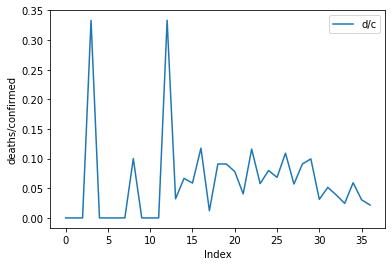

In [75]:
ind_state.plot(y='d/c', kind = 'line')
plt.xlabel('Index')
plt.ylabel('deaths/confirmed')
plt.show()

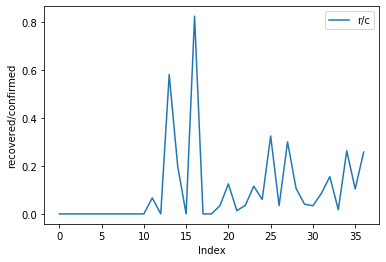

In [76]:
ind_state.plot(y='r/c', kind = 'line')
plt.xlabel('Index')
plt.ylabel('recovered/confirmed')
plt.show()